In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as scy

g=9.8


In [66]:
class Cuerpo:
    def __init__(self,x0,y0,z0,Vx0,Vy0,Vz0,m0):
        self.m = m0
        self.r = np.array([x0,y0,z0])
        self.V = np.array([Vx0,Vy0,Vz0])

    def CalculeFuerza(self):
        self.F = np.array([0,-self.m*g,0])
    def Muevase(self,dt):
        self.r = self.r + dt*self.V
        self.V = self.V + (dt/self.m)*self.F

In [67]:
Deltat=0.01
Nsteps = 100
xdata=np.zeros(100)
ydata=np.zeros(100)
#--------------x0,y0,z0,Vx0
Balon = Cuerpo(0,0,0,16,8,0,0.453)

for i in range(Nsteps):
    t=i*Deltat
    xdata[i]=Balon.r[0]
    ydata[i]=Balon.r[1]
    Balon.CalculeFuerza()
    Balon.Muevase(Deltat)


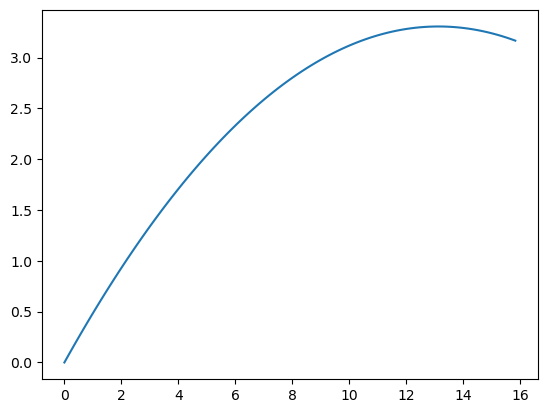

In [68]:
plt.plot(xdata,ydata)
plt.show()

In [69]:
GM=1.0
class Cuerpo:
  def __init__(self,x0,y0,z0,Vx0,Vy0,Vz0,m0):
    self.m=m0
    self.r=np.array([x0,y0,z0])
    self.V=np.array([Vx0,Vy0,Vz0])
  def CalculeFuerza(self):
    aux=-GM*self.m/np.linalg.norm(self.r)**3
    self.F = aux*self.r
  def Muevase(self,dt):
    self.r=self.r+dt*self.V
    self.V=self.V+(dt/self.m)*self.F

In [70]:
#Condiciones Inicia;es
Deltat=1e-3
Nsteps=int(1e5)
StepsPerFrame=int(1e2)
Nframes=Nsteps//StepsPerFrame
r0 =10

In [71]:
r0=10
omega=np.sqrt(GM/(r0**3))
T=2*np.pi/omega
V0=omega*r0

xdata=np.zeros(Nframes)
ydata=np.zeros(Nframes)
Balon=Cuerpo(x0=r0,y0=0,z0=0,Vx0=0,Vy0=0.5*V0,Vz0=0,m0=0.453)

for i in range(Nsteps):
    t=i*Deltat
    if(i%StepsPerFrame==0):
        k = i//StepsPerFrame
        xdata[k]=Balon.r[0]
        ydata[k]=Balon.r[1]
    Balon.CalculeFuerza()
    Balon.Muevase(Deltat)

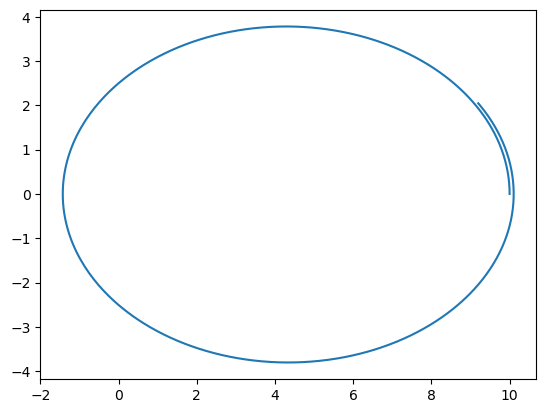

In [72]:
plt.plot(xdata,ydata)
plt.show()

In [ ]:
%%writefile UnBalon.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;

const double g=9.8;

//Deaclaración de la clase
class Cuerpo;

//Deaclaración de la interfase
class Cuerpo{
private:
  vector3D r,V,F; double m,R;
public:
  void Inicie(double x0,double y0,double z0,double Vx0,double Vy0,double Vz0,
	      double m0,double R0);
  void CalculeFuerza(void);
  void Muevase(double dt);
  double Getx(void){return r.x();}; // Inline
  double Gety(void){return r.y();}; // Inline
};
//Implementación de las funciones
void Cuerpo::Inicie(double x0,double y0,double z0,double Vx0,double Vy0,double Vz0,
	      double m0,double R0){
  r.load(x0,y0,z0); V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::CalculeFuerza(void){
  F.load(0,-m*g,0);
}
void Cuerpo::Muevase(double dt){
  //Algoritmo de Euler
  r+=V*dt;  V+=F*(dt/m);
}

//----------- Funciones Globales -----------


int main(){
  double t,dt=0.001,ttotal=2.5;
  int Ncuadros=200; double tdibujo,tcuadro=ttotal/Ncuadros;
  Cuerpo Balon;


  //----------(x0,y0,z0,Vx0,Vy0,Vz0,m0   ,R0)
  Balon.Inicie( 0, 0, 0, 16,  9,  0,0.453,1.0);
  for(t=tdibujo=0;t<ttotal;t+=dt,tdibujo+=dt){
    if(tdibujo>tcuadro){

      tdibujo=0;
    }
    cout<<Balon.Getx()<<" "<<Balon.Gety()<<endl;
    Balon.CalculeFuerza();
    Balon.Muevase(dt);

  }
  return 0;
}


Overwriting UnBalon.cpp


In [ ]:
%%cmd
g++ UnBalon.cpp
./a.exe > datos.dat    

# %%shell
# g++ UnBalon.cpp
# ./a.out > datos.dat



Microsoft Windows [Versión 10.0.19045.4046]
(c) Microsoft Corporation. Todos los derechos reservados.

(base) d:\Personal\Estudio\Universidad\Matriculas\Octava matricula\Métodos de Simulación\Clases\Elementos Discretos (DEM) (8 clases)>g++ UnBalon.cpp



(base) d:\Personal\Estudio\Universidad\Matriculas\Octava matricula\Métodos de Simulación\Clases\Elementos Discretos (DEM) (8 clases)>./a.exe > datos.dat    


"." no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.



(base) d:\Personal\Estudio\Universidad\Matriculas\Octava matricula\Métodos de Simulación\Clases\Elementos Discretos (DEM) (8 clases)>
(base) d:\Personal\Estudio\Universidad\Matriculas\Octava matricula\Métodos de Simulación\Clases\Elementos Discretos (DEM) (8 clases)># %%shell


"#" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.



(base) d:\Personal\Estudio\Universidad\Matriculas\Octava matricula\Métodos de Simulación\Clases\Elementos Discretos (DEM) (8 clases)># g++ UnBalon.cpp


"#" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.



(base) d:\Personal\Estudio\Universidad\Matriculas\Octava matricula\Métodos de Simulación\Clases\Elementos Discretos (DEM) (8 clases)># ./a.out > datos.dat


"#" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.



(base) d:\Personal\Estudio\Universidad\Matriculas\Octava matricula\Métodos de Simulación\Clases\Elementos Discretos (DEM) (8 clases)>
(base) d:\Personal\Estudio\Universidad\Matriculas\Octava matricula\Métodos de Simulación\Clases\Elementos Discretos (DEM) (8 clases)>

In [ ]:
def graficar(datos):

    path = "./"+ datos + ".dat"
    data = pd.read_csv(path,sep=' ',names=['t','x1','x2'])

    plt.plot(data['t'],data['x1'],label='x1')

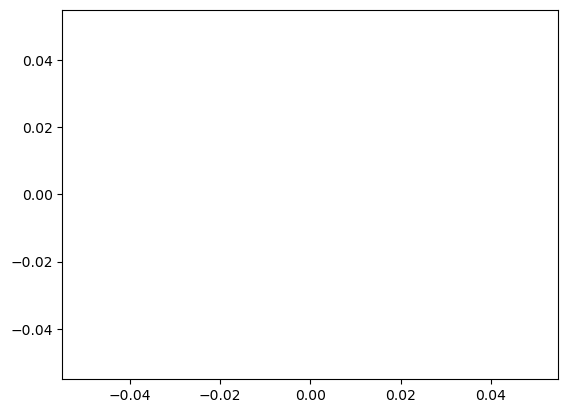

In [ ]:
graficar('datos')